<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Regresion%20lineal/SRT%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v2 - Ensayo
### Regresion lineal - Datos reales

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Importamos Datos

In [20]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/cod_postal_series.csv

--2023-05-04 13:30:59--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/cod_postal_series.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2977660 (2.8M) [text/plain]
Saving to: ‘cod_postal_series.csv’

cod_postal_series.c 100%[===================>]   2.84M  --.-KB/s    in 0.07s   

2023-05-04 13:31:00 (39.4 MB/s) - ‘cod_postal_series.csv’ saved [2977660/2977660]



In [29]:
df = pd.read_csv('/content/cod_postal_series.csv', header=0,
                 names=['codigo','año','mes','total_cp'],
                 dtype={'codigo': str, 'año': str, 'mes': str, 'total_cp': str})

In [30]:
df.head()

,codigo,año,mes,total_cp
0,0,2022.0,1,208
1,0,2022.0,2,185
2,0,2022.0,3,289
3,0,2022.0,4,177
4,0,2022.0,5,177


### EDA

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147066 entries, 0 to 147065
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   codigo    147066 non-null  object
 1   año       147066 non-null  object
 2   mes       147066 non-null  object
 3   total_cp  147066 non-null  object
dtypes: object(4)
memory usage: 4.5+ MB


#### Ajustamos tipo de datos

In [32]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [33]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [34]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [35]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [36]:
df.head()

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177


In [37]:
df.sort_values(['año','mes'], ascending=True)

,codigo,año,mes,total_cp
0,0,2022,1,208
33,01000000,2022,1,19
49,01001000,2022,1,172
65,01002000,2022,1,20
81,01003000,2022,1,7
...,...,...,...,...
146965,Z9050DJG,2023,4,1
146969,Z9303XAT,2023,4,1
146971,Z9310BDE,2023,4,1
146990,Z9400BJA,2023,4,1


#### Verificamos cantidad de registros por codigo

In [38]:
codigos = df.value_counts('codigo')

In [39]:
mayores_a_15 = codigos[codigos > 15]

In [40]:
df = df[df['codigo'].isin(mayores_a_15.index)]

In [41]:
df

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177
...,...,...,...,...
146961,Z9050DJG,2022,12,2
146962,Z9050DJG,2023,1,2
146963,Z9050DJG,2023,2,6
146964,Z9050DJG,2023,3,1


### Transformacion

#### LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [44]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [45]:
X_encoded.shape

(25440,)

In [46]:
pd.DataFrame(X_encoded)

,0
0,0
1,0
2,0
3,0
4,0
...,...
25435,1589
25436,1589
25437,1589
25438,1589


#### Embeddings

In [47]:
tamano_embedding = 10

In [48]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [49]:
matriz_embedding

array([[0.71130259, 0.96729257, 0.79092182, ..., 0.82590046, 0.40588597,
        0.12012578],
       [0.27171134, 0.16754422, 0.89015444, ..., 0.09097183, 0.0433784 ,
        0.65201761],
       [0.38800878, 0.98661278, 0.87777985, ..., 0.44780461, 0.91694009,
        0.59889372],
       ...,
       [0.07283847, 0.71021408, 0.42351056, ..., 0.42352294, 0.89577854,
        0.20486171],
       [0.11894514, 0.02909225, 0.07392196, ..., 0.91988227, 0.76555099,
        0.48952865],
       [0.59994607, 0.5065067 , 0.79481197, ..., 0.75486043, 0.36574475,
        0.07256024]])

In [50]:
encoder.classes_

array(['0', '01000000', '01001000', ..., 'Y4612JYI', 'Y4612XAI',
       'Z9050DJG'], dtype=object)

In [51]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [52]:
atributos_embeddings.shape

(25440, 10)

#### Verificacion embeddings

In [53]:
i = 0
encoder.classes_[i]

'0'

In [54]:
matriz_embedding[i]

array([0.71130259, 0.96729257, 0.79092182, 0.1515069 , 0.39647256,
       0.82119675, 0.81500023, 0.82590046, 0.40588597, 0.12012578])

In [55]:
matriz_embedding.shape

(1590, 10)

#### Dataframe con datos de embeddings

In [56]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [57]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.825900,0.405886,0.120126
1,0.271711,0.167544,0.890154,0.591715,0.910081,0.789925,0.113955,0.090972,0.043378,0.652018
2,0.388009,0.986613,0.877780,0.485062,0.245715,0.294389,0.252629,0.447805,0.916940,0.598894
3,0.377818,0.647134,0.493284,0.110677,0.711104,0.382830,0.657047,0.338323,0.395863,0.801734
4,0.254774,0.817671,0.829984,0.259932,0.203737,0.960901,0.503016,0.636428,0.115064,0.799300
...,...,...,...,...,...,...,...,...,...,...
1585,0.950452,0.071928,0.971095,0.672448,0.402803,0.819471,0.520664,0.213122,0.375870,0.516748
1586,0.333524,0.633725,0.942579,0.799770,0.805695,0.631812,0.053919,0.153205,0.974594,0.147349
1587,0.072838,0.710214,0.423511,0.517977,0.191800,0.596297,0.380671,0.423523,0.895779,0.204862
1588,0.118945,0.029092,0.073922,0.108575,0.336355,0.892965,0.299134,0.919882,0.765551,0.489529


In [58]:
embedding_df['codigo'] = encoder.classes_

In [59]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
codigo,,,,,,,,,,
0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.825900,0.405886,0.120126
01000000,0.271711,0.167544,0.890154,0.591715,0.910081,0.789925,0.113955,0.090972,0.043378,0.652018
01001000,0.388009,0.986613,0.877780,0.485062,0.245715,0.294389,0.252629,0.447805,0.916940,0.598894
01002000,0.377818,0.647134,0.493284,0.110677,0.711104,0.382830,0.657047,0.338323,0.395863,0.801734
01003000,0.254774,0.817671,0.829984,0.259932,0.203737,0.960901,0.503016,0.636428,0.115064,0.799300
...,...,...,...,...,...,...,...,...,...,...
Y4604CJC,0.950452,0.071928,0.971095,0.672448,0.402803,0.819471,0.520664,0.213122,0.375870,0.516748
Y4610XAH,0.333524,0.633725,0.942579,0.799770,0.805695,0.631812,0.053919,0.153205,0.974594,0.147349
Y4612JYI,0.072838,0.710214,0.423511,0.517977,0.191800,0.596297,0.380671,0.423523,0.895779,0.204862


In [60]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
0,2022,1,208
0,2022,2,185
0,2022,3,289
0,2022,4,177
0,2022,5,177
...,...,...,...
Z9050DJG,2022,12,2
Z9050DJG,2023,1,2
Z9050DJG,2023,2,6


In [61]:
df.total_cp.max()

5314

#### Transformar la variable de salida

In [62]:
mmscaler = MinMaxScaler()

In [63]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [64]:
df.head()

,año,mes,total_cp
codigo,,,
0,2022,1,0.038961
0,2022,2,0.034632
0,2022,3,0.054207
0,2022,4,0.033126
0,2022,5,0.033126


#### Joins de Dataframes

In [65]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
codigo,,,,,,,,,,,,,
0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,1,0.038961
0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,2,0.034632
0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,3,0.054207
0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,4,0.033126
0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9050DJG,0.599946,0.506507,0.794812,0.820491,0.133238,0.957418,0.072415,0.75486,0.365745,0.072560,2022,12,0.000188
Z9050DJG,0.599946,0.506507,0.794812,0.820491,0.133238,0.957418,0.072415,0.75486,0.365745,0.072560,2023,1,0.000188
Z9050DJG,0.599946,0.506507,0.794812,0.820491,0.133238,0.957418,0.072415,0.75486,0.365745,0.072560,2023,2,0.000941


#### Datos de entrenamiento

In [66]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
0,0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,1,0.038961
1,0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,2,0.034632
2,0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,3,0.054207
3,0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,4,0.033126
4,0,0.711303,0.967293,0.790922,0.151507,0.396473,0.821197,0.815000,0.82590,0.405886,0.120126,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,Z9050DJG,0.599946,0.506507,0.794812,0.820491,0.133238,0.957418,0.072415,0.75486,0.365745,0.072560,2022,12,0.000188
25436,Z9050DJG,0.599946,0.506507,0.794812,0.820491,0.133238,0.957418,0.072415,0.75486,0.365745,0.072560,2023,1,0.000188
25437,Z9050DJG,0.599946,0.506507,0.794812,0.820491,0.133238,0.957418,0.072415,0.75486,0.365745,0.072560,2023,2,0.000941
25438,Z9050DJG,0.599946,0.506507,0.794812,0.820491,0.133238,0.957418,0.072415,0.75486,0.365745,0.072560,2023,3,0.000000


In [67]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [68]:
X_data.shape

(25440, 12)

In [69]:
y_data = df_final['total_cp'].to_numpy()

In [70]:
y_data

array([0.03896104, 0.03463203, 0.05420666, ..., 0.00094109, 0.        ,
       0.        ])

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [72]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Validacion

In [73]:
pred_train = modelo.predict(X_train)
pred_test = modelo.predict(X_test)

In [74]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test  = mean_squared_error(y_test, pred_test)

In [75]:
mse_train, mse_test

(0.000257467390134771, 0.00020030365717636122)

In [76]:
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
print('RMSE:', round(rmse_train,4), round(rmse_test,4))

RMSE: 0.016 0.0142


In [77]:
score = r2_score(y_test, pred_test)
print(f'R2 score: {score:.5f}')

R2 score: 0.00962


No es un buen resultado

### Prediccion

In [78]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [79]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [80]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [81]:
atributos_in = atributos_in.reshape(1, 12)

In [82]:
pred = modelo.predict(atributos_in)

In [83]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [84]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 08370000 Año 2023 Mes 6: 15.95 incidentes


### Verificacion grafica

In [85]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
9424,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,1,0.007152
9425,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,2,0.004894
9426,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,3,0.003953
9427,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,4,0.004705
9428,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,5,0.005647
9429,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,6,0.003953
9430,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,7,0.005082
9431,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,8,0.006776
9432,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,9,0.005270
9433,08370000,0.636297,0.047647,0.657131,0.195374,0.409265,0.465594,0.462789,0.407223,0.408729,0.035721,2022,10,0.004329


In [86]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [87]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][11])+'-'+str(row[1][12])+'-01')
    totales.append(row[1][13])

In [88]:
fechas[0]

'2022-1-01'

In [89]:
totales = mmscaler.inverse_transform([totales])

In [90]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

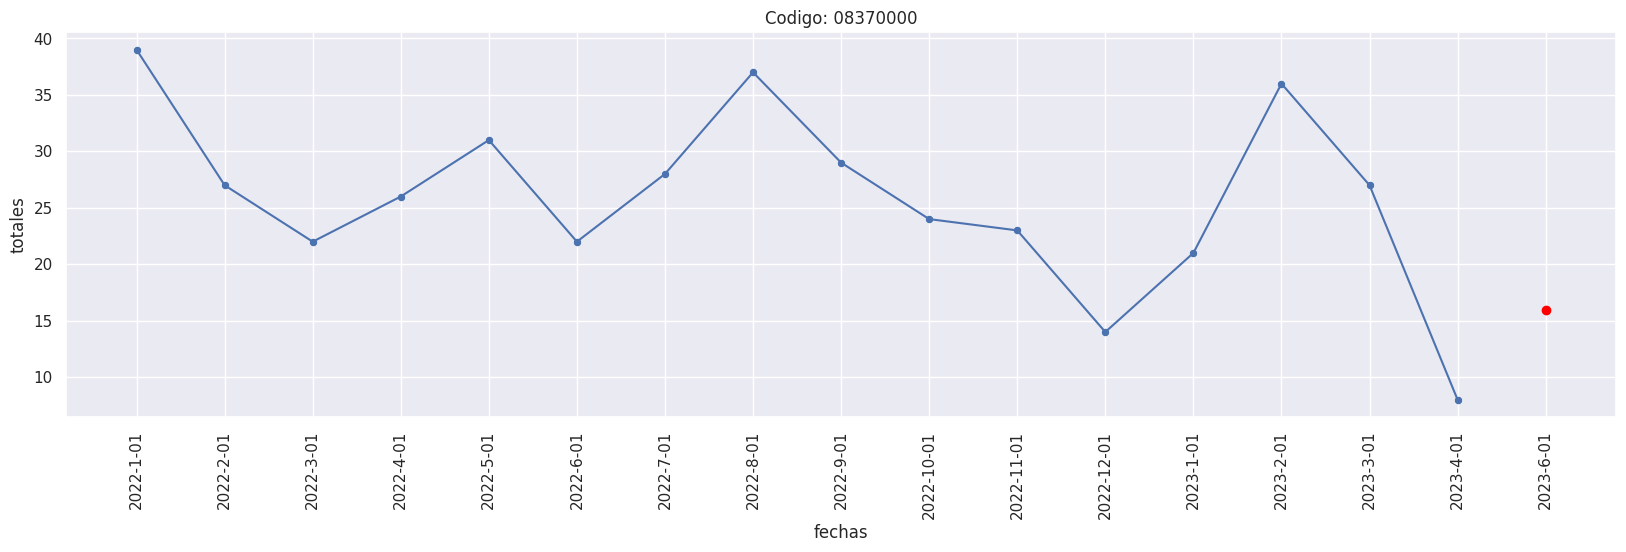

In [91]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()